In [ ]:
from google.colab import files
uploaded = files.upload()


Saving User_Data.csv to User_Data.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('User_Data.csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
dataset.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [ ]:
x_train, y_train = dataset.iloc[:300, 1:-1].values, dataset.iloc[:300, -1].values

In [ ]:
x_train[0]

array([    1,    19, 19000])

In [ ]:
x_train = np.array(x_train).astype('float32')

In [ ]:
x_train -= np.mean(x_train)

In [ ]:
x_train /= np.std(x_train)

In [ ]:
def get_norm(dataset : any, dataset_target : any, datapoint : any, p : int,k : int) -> any: 
  distance_arry = []
  for i,data in enumerate(dataset):
    dist = 0  
    for j, ele in enumerate(data): 
      dist += (datapoint[j] - ele) ** p 
    dist **= 1/p 
    if len(distance_arry)  < k:
      distance_arry.append([dist, dataset_target[i]])
      continue
    max_index = 0 
    max_value = -1
    for m, ele in enumerate(distance_arry): 
      if distance_arry[m][0] > max_value: 
        max_value = distance_arry[m][0]
        max_index = m 
    if max_value > dist: 
      # print(distance_arry)
      # print("== i ==", i , "== dataset - target -, ", dataset_target[i])
      distance_arry[max_index] = [dist, dataset_target[i]]
  return distance_arry

In [ ]:
y_train[0]

0

In [ ]:
result_dist = get_norm(x_train, y_train, x_train[20], 2, 4)

[[0.0782241838940537, 0], [0.05214815192272401, 0], [0.5475489360078647, 0], [0.9125812668207742, 0]]
== i == 8 == dataset - target -,  0
[[0.0782241838940537, 0], [0.05214815192272401, 0], [0.5475489360078647, 0], [0.286811706645629, 0]]
== i == 13 == dataset - target -,  0
[[0.0782241838940537, 0], [0.05214815192272401, 0], [0.1042955510885407, 0], [0.286811706645629, 0]]
== i == 16 == dataset - target -,  1
[[0.0782241838940537, 0], [0.05214815192272401, 0], [0.1042955510885407, 0], [0.07822126398702628, 1]]
== i == 17 == dataset - target -,  1
[[0.0782241838940537, 0], [0.05214815192272401, 0], [0.10429500043392181, 1], [0.07822126398702628, 1]]
== i == 20 == dataset - target -,  1
[[0.0782241838940537, 0], [0.05214815192272401, 0], [0.0, 1], [0.07822126398702628, 1]]
== i == 23 == dataset - target -,  1
[[2.6106834411621094e-05, 1], [0.05214815192272401, 0], [0.0, 1], [0.07822126398702628, 1]]
== i == 24 == dataset - target -,  1
[[2.6106834411621094e-05, 1], [0.05214815192272401,

In [ ]:
def find_result(result_dist : any) -> int: 
  dict_count = {}
  res = -1
  max_value = 0
  for i in result_dist: 
    i[1] = str(i[1])
    if i[1] not in result_dist: 
      dict_count[i[1]] = 1
    else: 
      dict_count[i[1]] += 1
    if dict_count[i[1]] > max_value: 
      res = i[1]
  return res


['0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1']
[0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0
 0 0 1 1 0 1 1 0 1 0 1 0 1]


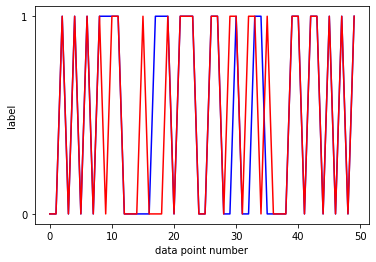

In [ ]:
import matplotlib.pyplot as plt
d = x_train[200:250]
result = []
for i in d: 
  result.append(find_result(get_norm(x_train, y_train, i, 2, 5)))
print(result)
print(y_train[200:250])
plt.plot(range(len(d)), result, color = 'b')
plt.plot(range(len(d)), y_train[200:250], color = 'r')
plt.xlabel("data point number")
plt.ylabel("label")
plt.show()

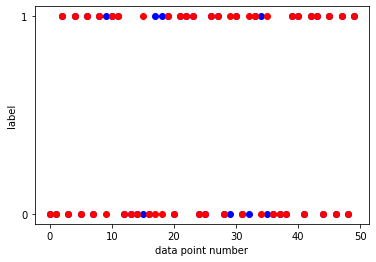

In [ ]:
plt.scatter(range(len(d)), result, color = 'b')
plt.scatter(range(len(d)), y_train[200:250], color = 'r')
plt.xlabel("data point number")
plt.ylabel("label")
plt.show()